# Clustering and classification in Python 🐍

This notebook introduces basic clustering algorithm in Python using Scikit-learn module. At first, we have to import necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

The first step is to generate data needed for the presentation. Specify number of clusters to be generated by specifying `no_clusters` variable.

In [2]:
no_clusters = 5
X, Y = make_blobs(n_samples=200, centers=no_clusters,
                  n_features=2, random_state=0)

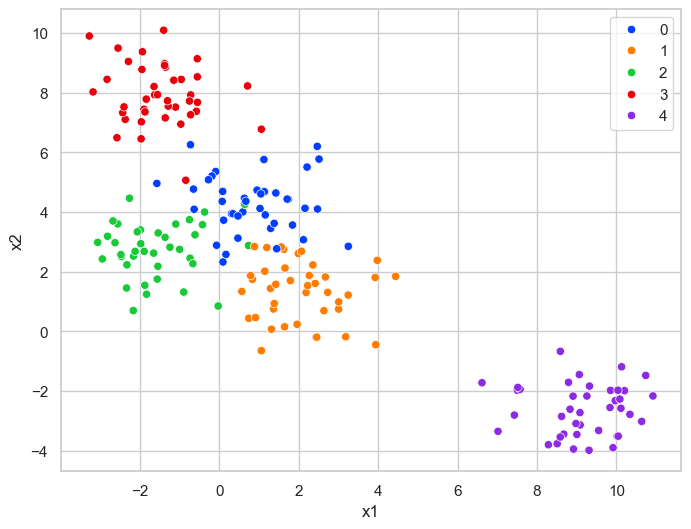

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y, palette='bright')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## K-means clustering training

In the code below, we train k-means clustering model using scikit-learn library. We do it for several different numbers of clusters, to find optimum numbers of center points that minimize the inertia of the model.

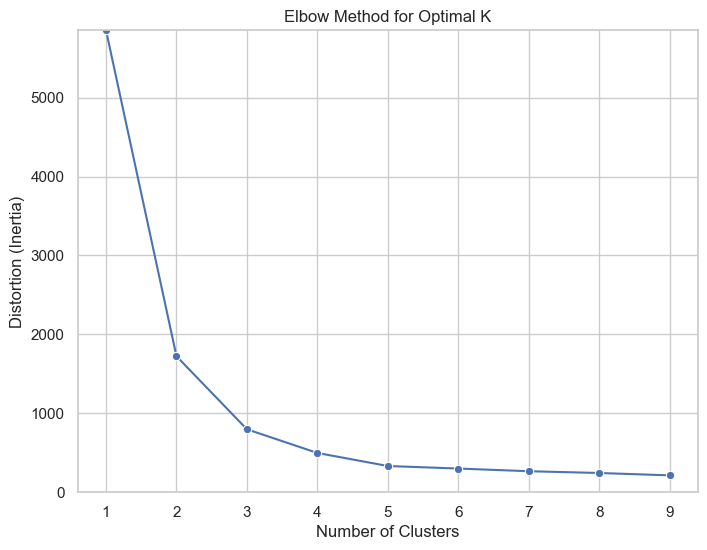

In [4]:
cluster_range = range(1, no_clusters * 2)
distortions = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
sns.lineplot(x=cluster_range, y=distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.ylim(0, max(distortions))
plt.xticks(range(1, max(cluster_range) + 1))
plt.show();

## Cluster visualization

You can select the value of `optimal_k` to see the clustering graph. You can select any integer value here.

### Plotting blobs for different numbers of centers

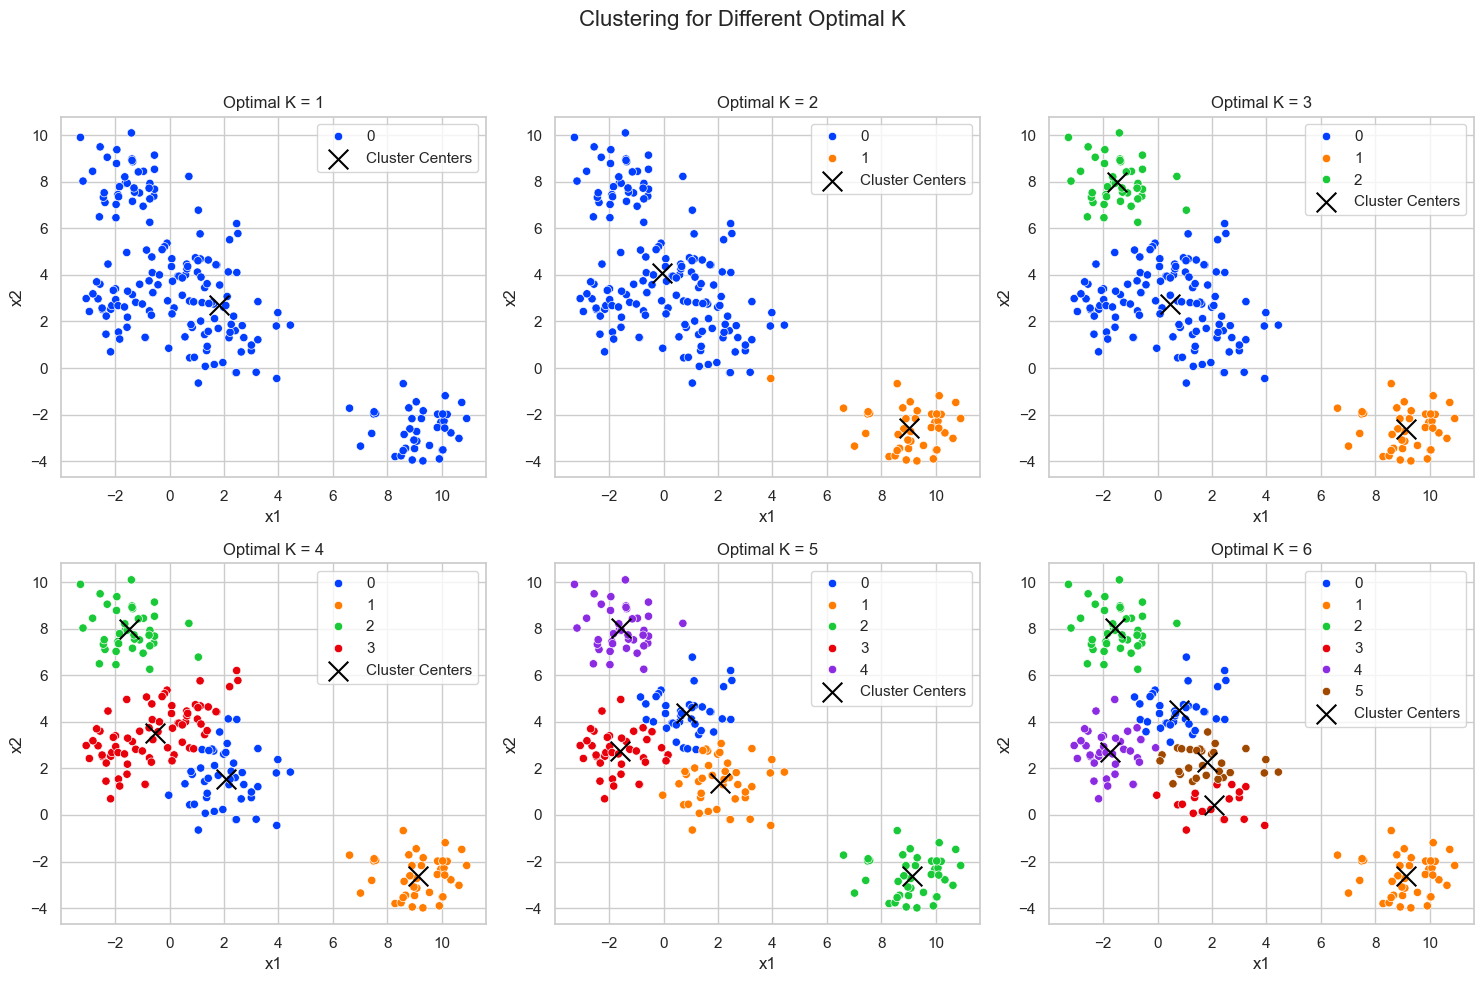

In [5]:
k_values = [i for i in range(1,no_clusters + 2)]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Clustering for Different Optimal K', fontsize=16)

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    ax = axes[i // 3, i % 3]
    sns.set(style='whitegrid')
    scatterplot = sns.scatterplot(x=X[:,0], y=X[:,1],
                                  hue=kmeans.labels_, palette='bright',
                                  legend='full', ax=ax)
    ax.set_title(f'Optimal K = {k}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    cluster_centers = kmeans.cluster_centers_
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
               s=200, c='black', marker='x', label='Cluster Centers')
    ax.legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show();

In [6]:
optimal_k = 5

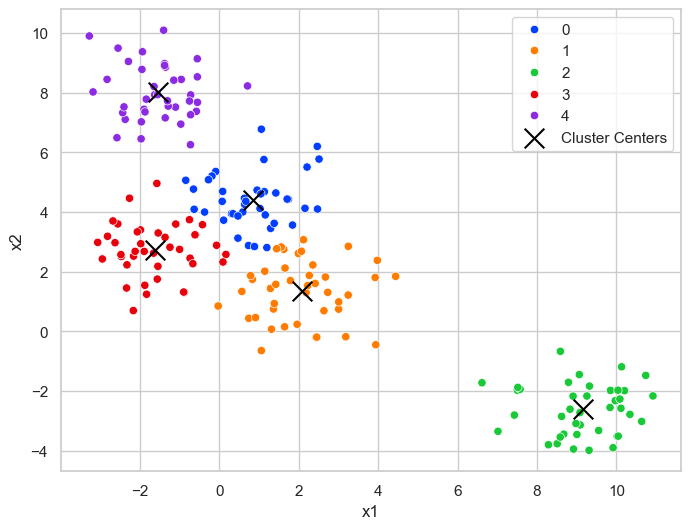

In [7]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
kmeans.fit(X)
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
scatterplot = sns.scatterplot(x=X[:,0], y=X[:,1],
                              hue=kmeans.labels_, palette='bright',
                              legend='full')
plt.xlabel('x1')
plt.ylabel('x2')
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            s=200, c='black', marker='x', label='Cluster Centers')
plt.legend()
plt.show();

## Classification of blobs

### Train/test split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=18)

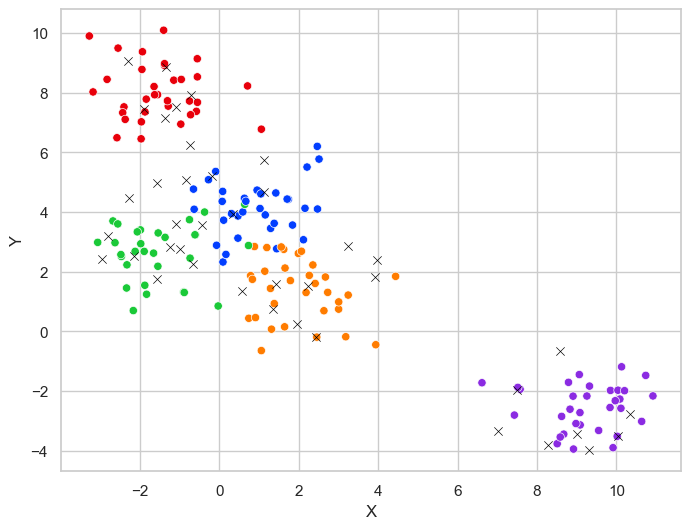

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=Y_train, palette='bright')
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], color='black', marker='x')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend().set_visible(False)
plt.show()

### Logistic regression training

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Yhat = logreg.predict(X_test)
print(f"Accuracy for the train set: {logreg.score(X_train, Y_train)}")
print(f"Accuracy for the test set: {logreg.score(X_test, Y_test)}")

Accuracy for the train set: 0.93125
Accuracy for the test set: 0.9


In [11]:
data = {'X1': X_test[:,0], 'X2': X_test[:,1], 'Y' : Y_test, 'Yhat' : Yhat}
predictions = pd.DataFrame(data)
misclassified = predictions[Yhat != Y_test]
correct = predictions[Yhat == Y_test]
print(misclassified)

          X1        X2  Y  Yhat
2  -0.849209  5.062867  3     0
11 -0.730000  6.254563  0     3
15  3.246025  2.849422  0     1
27 -1.576720  4.957406  0     2
